In [ ]:
CONFIG_PATH = "configs/debug_med_LM.yml"

In [7]:

from utils import get_config
from superdebug import debug
from data import get_model_input
config = get_config(CONFIG_PATH) # default config
all_feature_columns, target, train_model_input, test_model_input, feature_names, original_feature_map, max_voted_users, train_data, test_data = get_model_input(config)
debug(max_voted_users=max_voted_users)

GPU ready...
Smart using cuda:2
------------------ 2022-07-19 21:14:54 ------------------
DEBUG: at /home/TableSense/largedisk/wanrong/Curation-Modeling/data.py:187 get_model_input
Loading prepared data...
------------------ 2022-07-19 21:14:54 ------------------
------------------ 2022-07-19 21:15:00 ------------------
DEBUG: 1 vars: ['max_voted_users'], at <ipython-input-7-1737157bf73a>:8 <module>
0 / 3.  max_voted_users num val: 8
------------------ 2022-07-19 21:15:00 ------------------


In [8]:
from collections import Counter, defaultdict, OrderedDict
debug(train_upvote = sum(train_data["VOTE"] == 1),
    train_downvote = sum(train_data["VOTE"] == 0),
    test_upvote = sum(test_data["VOTE"] == 1),
    test_downvote = sum(test_data["VOTE"] == 0),
    )
user_votes = Counter()
submission_votes = Counter()
subreddit_subreddit_votes = defaultdict(Counter)
for row_i, row in train_data.iterrows():
    submission_votes[row["SUBMISSION_ID"]] += 1
    user_votes[row["USERNAME"]] += 1
    subreddit_subreddit_votes[row["SUBREDDIT"]][row["VOTE"]] += 1
    if "users" not in subreddit_subreddit_votes[row["SUBREDDIT"]]:
        subreddit_subreddit_votes[row["SUBREDDIT"]]["users"] = set()
    subreddit_subreddit_votes[row["SUBREDDIT"]]["users"].add(row["USERNAME"])


------------------ 2022-07-19 21:15:12 ------------------
DEBUG: 4 vars: ['train_upvote', 'train_downvote', 'test_upvote', 'test_downvote'], at <ipython-input-8-bf241b5dc052>:5 <module>
0 / 4.  train_upvote num val: 85251
1 / 5.  train_downvote num val: 85317
2 / 6.  test_upvote num val: 21355
3 / 7.  test_downvote num val: 21288
------------------ 2022-07-19 21:15:12 ------------------


------------------ 2022-07-19 21:28:06 ------------------
DEBUG: 1 vars: ['distribution'], at <ipython-input-21-c97ac91a4c4a>:18 draw_histogram
0 / 10.  distribution str len 2701: OrderedDict([(1, 2), (2, 1), (3, 4), (4, 1), (5, 7), (6, 4), (7, 3), (8, 1), (9, 4), (10, 2), (11, 3), (12, 1), (14, 2), (15, 2), (16, 3), (17, 2), (18, 2), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 2), (25, 2), (26, 1), (27, 1), (29, 2), (31, 1), (32, 3), (33, 3), (34, 1), (36, 2), (37, 4), (39, 2), (41, 1), (42, 2), (44, 1), (45, 1), (46, 3), (48, 1), (51, 1), (52, 2), (54, 2), (55, 1), (60, 3), (63, 2), (64, 1), (67, 1), (71, 2), (77, 1), (78, 2), (80, 2), (82, 3), (84, 1), (89, 1), (90, 2), (91, 3), (92 ... 83, 1), (10771, 1)])
------------------ 2022-07-19 21:28:06 ------------------


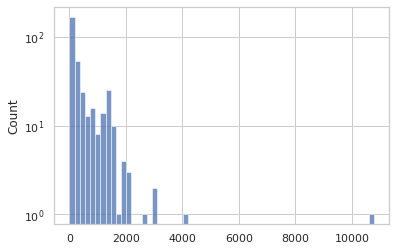

------------------ 2022-07-19 21:28:06 ------------------
DEBUG: at <ipython-input-21-c97ac91a4c4a>:24 draw_histogram
Figure saved in output/user_votes_distribution.png
------------------ 2022-07-19 21:28:06 ------------------
------------------ 2022-07-19 21:28:07 ------------------
DEBUG: 1 vars: ['distribution'], at <ipython-input-21-c97ac91a4c4a>:18 draw_histogram
0 / 11.  distribution str len 81: OrderedDict([(1, 162932), (2, 3184), (3, 320), (4, 55), (5, 10), (6, 4), (7, 2)])
------------------ 2022-07-19 21:28:07 ------------------


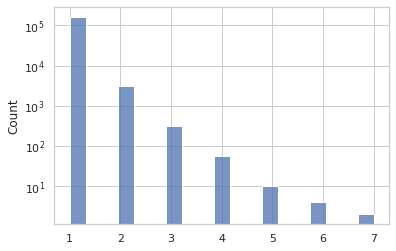

------------------ 2022-07-19 21:28:07 ------------------
DEBUG: at <ipython-input-21-c97ac91a4c4a>:24 draw_histogram
Figure saved in output/submission_votes_distribution.png
------------------ 2022-07-19 21:28:07 ------------------


In [21]:
from importlib_metadata import distribution
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
def draw_histogram(num_votes:list, file_name):
    # df_dict = {"#votes=n": [], "count": []}
    # counter = OrderedDict(sorted(list(counter.items()), key = lambda x:x[0]))
    # for item in counter.items():
    #     df_dict["#votes=n"].append(item[0])
    #     df_dict["count"].append(item[1])
    # df = pd.DataFrame(df_dict)
    sns.set_theme(style="whitegrid")
    ax = sns.histplot(data=num_votes)
    ax.set_yscale('log')
    # ax.set_xscale('log')
    distribution = OrderedDict(sorted(list(Counter(num_votes).items())))
    debug(distribution=str(distribution))
    # ax.text(-0.15, 1.1, distribution, fontsize=7, transform=ax.transAxes)
    save_path = f"output/{file_name}.png"
    plt.show()
    plt.savefig(save_path, dpi = 300)
    plt.close()
    debug(f"Figure saved in {save_path}")

draw_histogram(list(user_votes.values()), "user_votes_distribution")
draw_histogram(list(submission_votes.values()), "submission_votes_distribution")

In [22]:
for subreddit in subreddit_subreddit_votes:
    subreddit_subreddit_votes[subreddit]["downvote_rate"] = 100 * subreddit_subreddit_votes[subreddit][0] / (subreddit_subreddit_votes[subreddit][1] + subreddit_subreddit_votes[subreddit][0])
    subreddit_subreddit_votes[subreddit]["subreddit"] = original_feature_map["SUBREDDIT"][subreddit]
    subreddit_subreddit_votes[subreddit]["users"] = str(subreddit_subreddit_votes[subreddit]["users"])
subreddit_subreddit_votes = pd.DataFrame(list(subreddit_subreddit_votes.values())).set_index("subreddit")
debug(subreddit_votes=subreddit_subreddit_votes)
save_path = "output/subreddit_votes_users.csv"
subreddit_subreddit_votes.to_csv(save_path)
debug(f"Votes of each subreddit is saved to {save_path}")

------------------ 2022-07-19 21:28:45 ------------------
DEBUG: 1 vars: ['subreddit_votes'], at <ipython-input-22-301709a3aa7a>:6 <module>
0 / 12.  subreddit_votes pandas.core.frame.DataFrame with props ['_is_copy', '_mgr', '_item_cache', '_attrs'] val:                               0  \
subreddit                         
r/Fire_Emblem_R34           6.0   
r/CrazyAOC                 47.0   
r/PokemonSwordAndShield     2.0   
r/tf2                     254.0   
r/pics                   2203.0   
...                         ...   
r/shittyMBTI                1.0   
r/EDAnonymous               NaN   
r/polarsaurusrex            NaN   
r/ImaginaryWorldEaters      NaN   
r/GakiNoTsukai              1.0   

                                                                     users  \
subreddit                                                                    
r/Fire_Emblem_R34                                                     {14}   
r/CrazyAOC                                             